<a href="https://colab.research.google.com/github/Ironsoldier353/freelance-clone/blob/main/skill_matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyPDF2

In [ ]:
import PyPDF2
import spacy
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Load spaCy's pre-trained English model
nlp = spacy.load("en_core_web_sm")

In [ ]:
# Define a skill mapping for inference
skill_inference = {
    # Programming & Development
    "Programming & Development": [
        "Python", "JavaScript", "Java", "C++", "PHP", "Ruby", "Swift", "Kotlin",
        "C#", "TypeScript", "R", "Go", "Rust", "Scala", "MATLAB", "Perl", "Shell Scripting"
    ],

    # Web Development
    "Web Development": {
        "Frontend Development": [
            "HTML", "CSS", "JavaScript", "React", "Angular", "Vue.js", "Bootstrap",
            "Sass", "Less", "jQuery", "Tailwind CSS", "Foundation"
        ],
        "Backend Development": [
            "Node.js", "Express.js", "Django", "Flask", "Ruby on Rails", "ASP.NET",
            "PHP", "Java", "Spring", "Laravel", "Golang", "Elixir"
        ],
        "Full Stack Development": [
            "MEAN Stack", "MERN Stack", "LAMP Stack", "JAMstack", "Serverless"
        ],
        "Content Management Systems": [
            "WordPress", "Drupal", "Joomla", "Magento", "Shopify", "Wix", "Squarespace",
            "TYPO3", "Sitecore"
        ]
    },

    # Mobile App Development
    "Mobile App Development": {
        "iOS Development": [
            "Swift", "Objective-C", "Xcode", "iOS SDK", "Cocoa Touch", "TestFlight"
        ],
        "Android Development": [
            "Kotlin", "Java", "Android Studio", "Gradle", "Android SDK", "Jetpack"
        ],
        "Cross-Platform Development": [
            "Flutter", "React Native", "Xamarin", "Ionic", "PhoneGap", "NativeScript"
        ]
    },

    # Design & Creative
    "Design & Creative": {
        "Graphic Design": [
            "Adobe Photoshop", "Illustrator", "CorelDRAW", "InDesign", "Adobe XD", "Figma",
            "Logo Design", "Branding", "Typography", "Print Design", "Digital Art", "Infographics"
        ],
        "UI/UX Design": [
            "Wireframing", "Prototyping", "User Experience Design", "User Interface Design",
            "Usability Testing", "Interaction Design", "User Research", "Information Architecture",
            "A/B Testing", "Design Thinking"
        ],
        "Video Production & Editing": [
            "Adobe Premiere Pro", "Final Cut Pro", "After Effects", "Motion Graphics",
            "Video Editing", "Color Correction", "Storyboarding", "Visual Effects", "3D Animation",
            "Sound Design"
        ],
        "3D Modeling & Animation": [
            "Blender", "Maya", "3ds Max", "Cinema 4D", "ZBrush", "SketchUp", "Mudbox",
            "Character Rigging", "Texturing", "Lighting", "Rendering", "Augmented Reality",
            "Virtual Reality", "Motion Capture"
        ]
    },

    # Data Science & Analytics
    "Data Science & Analytics ": {
        "Data Science": [
            "Python", "R", "SQL", "Excel", "Data Visualization", "Statistical Analysis",
            "ETL", "Data Mining","Data Analysis", "Machine Learning", "Big Data"
        ],
    "Data Analysis": [
            "Python", "R", "SQL", "Excel", "Data Visualization", "Statistical Analysis",
            "ETL", "Data Mining","Data Science", "Machine Learning", "Big Data","Tableau", "Power BI", "D3.js", "Matplotlib", "Seaborn", "Plotly"
        ],
        "Data Visualization": [
            "Tableau", "Power BI", "D3.js", "Matplotlib", "Seaborn", "Plotly"
        ],
        "Machine Learning": [
            "Scikit-Learn", "TensorFlow", "Keras", "PyTorch", "Natural Language Processing",
            "Predictive Modeling", "Algorithm Development", "Deep Learning","Python","R","Django","Flask"
        ],
        "Big Data": [
            "Hadoop", "Spark", "Kafka", "ETL", "Data Warehousing", "NoSQL Databases",
            "Apache Flink"
        ]
    },

    # Digital Marketing
    "Digital Marketing": {
        "Search Engine Optimization (SEO)": [
            "Keyword Research", "On-Page SEO", "Off-Page SEO", "Technical SEO", "Google Analytics",
            "Link Building", "Content Optimization", "Local SEO", "Mobile SEO"
        ],
        "Pay-Per-Click (PPC) Advertising": [
            "Google Ads", "Bing Ads", "Campaign Management", "Ad Copywriting", "Bid Management",
            "Remarketing", "Programmatic Advertising"
        ],
        "Social Media Marketing": [
            "Facebook Ads", "Instagram Ads", "LinkedIn Ads", "Content Strategy", "Community Management",
            "Influencer Marketing", "Social Media Analytics", "Social Media Strategy", "Video Marketing"
        ],
        "Email Marketing": [
            "Campaign Management", "Newsletter Design", "Audience Segmentation", "Automation",
            "A/B Testing", "Email Copywriting", "Email Deliverability"
        ]
    },

    # IT & Networking
    "IT & Networking": {
        "Network Administration": [
            "Network Security", "Firewall Management", "VPNs", "TCP/IP", "Network Troubleshooting",
            "Network Design", "Wireless Networks"
        ],
        "Systems Administration": [
            "Server Management", "Operating Systems", "Virtualization", "Backup Solutions",
            "Patch Management", "ITIL", "Cloud Infrastructure", "Linux Administration"
        ],
        "IT Support": [
            "Technical Support", "Help Desk Management", "Troubleshooting", "Customer Support",
            "ITIL", "Remote Support", "System Upgrades"
        ]
    },

    # Business & Management
    "Business & Management": {
        "Project Management": [
            "Agile", "Scrum", "Lean", "Risk Management", "Project Planning", "Gantt Charts",
            "JIRA", "Trello", "Kanban", "Resource Management"
        ],
        "Business Analysis": [
            "Requirements Gathering", "Process Improvement", "Data Analysis", "SWOT Analysis",
            "Stakeholder Management", "Business Process Modeling"
        ],
        "Strategic Planning": [
            "Business Strategy", "Market Analysis", "Business Development", "Competitive Analysis",
            "Strategic Forecasting", "Strategic Planning Models"
        ]
    },

    # Writing & Translation
    "Writing & Translation": {
        "Copywriting": [
            "Content Creation", "SEO Writing", "Marketing Materials", "Sales Copy", "Blog Writing",
            "Technical Copywriting", "Brand Messaging"
        ],
        "Technical Writing": [
            "Documentation", "User Manuals", "Technical Guides", "API Documentation", "Technical Reports",
            "Knowledge Base Articles"
        ],
        "Localization & Translation": [
            "Translation", "Localization", "Cultural Adaptation", "Multilingual Content",
            "Transcription", "Subtitling", "Voice-over Translation"
        ],
        "Proofreading & Editing": [
            "Grammar Checking", "Content Refinement", "Style Consistency", "Fact-Checking",
            "Copy Editing", "Developmental Editing"
        ]
    },

    # Cloud Computing & DevOps
    "Cloud Computing & DevOps": {
        "Cloud Services": [
            "AWS", "Azure", "Google Cloud", "Cloud Architecture", "Serverless Computing",
            "Cloud Security", "Cloud Migration", "Cloud Storage"
        ],
        "DevOps": [
            "Docker", "Kubernetes", "CI/CD", "Jenkins", "Infrastructure as Code",
            "Terraform", "Configuration Management", "Continuous Integration", "Continuous Deployment"
        ]
    },

    # Cybersecurity
    "Cybersecurity": {
        "Security Analysis": [
            "Penetration Testing", "Vulnerability Assessment", "Threat Analysis", "Risk Assessment",
            "Security Auditing", "Security Architecture", "Compliance Management"
        ],
        "Incident Response": [
            "Incident Handling", "Forensic Analysis", "Breach Management", "Threat Management",
            "Incident Detection", "Response Planning"
        ],
        "Network Security": [
            "Firewall Management", "Intrusion Detection Systems", "Network Monitoring", "VPNs",
            "Cryptography", "Network Access Control"
        ]
    },


    # E-commerce
    "E-commerce": {
        "Platform Development": [
            "Shopify", "Magento", "WooCommerce", "BigCommerce", "PrestaShop", "OpenCart",
            "osCommerce", "Ecwid"
        ],
        "Store Management": [
            "Product Listing", "Order Fulfillment", "Customer Service", "Payment Gateways",
            "Shopping Cart Integration", "Inventory Management", "Return Management"
        ],
        "Marketing & Optimization": [
            "E-commerce SEO", "Conversion Rate Optimization", "Affiliate Marketing", "Marketplaces",
            "Dropshipping", "Email Campaigns", "Sales Funnels", "A/B Testing"
        ]
    },


    # Education & Training
    "Education & Training": {
        "Corporate Training": [
            "Leadership Development", "Skills Training", "Employee Onboarding", "Compliance Training",
            "Soft Skills Training", "Technical Training", "Team Building"
        ],
        "Educational Content Creation": [
            "Curriculum Design", "E-Learning Modules", "Interactive Learning Materials", "Video Lectures",
            "Assessments", "Educational Games", "Training Manuals"
        ]
    },

    # Health & Wellness
    "Health & Wellness": {
        "Alternative Medicine": [
            "Acupuncture", "Homeopathy", "Herbal Medicine", "Ayurveda", "Naturopathy",
            "Chiropractic Care", "Traditional Chinese Medicine"
        ],
        "Wellness Coaching": [
            "Life Coaching", "Stress Management", "Health Goals", "Nutrition Planning",
            "Fitness Coaching", "Habit Formation", "Mental Wellness"
        ],
        "Health Consulting": [
            "Health Assessments", "Personal Health Plans", "Chronic Disease Management", "Preventative Health",
            "Health Risk Assessments", "Health Education"
        ]
    },


    # Architecture & Engineering
    "Architecture & Engineering": {
        "Architecture": [
            "Building Design", "Urban Planning", "Sustainable Architecture", "Landscape Design",
            "3D Rendering", "CAD Design", "Architectural Visualization"
        ],
        "Engineering": [
            "Civil Engineering", "Structural Engineering", "Mechanical Engineering", "Electrical Engineering",
            "Environmental Engineering", "Project Management", "Engineering Consulting"
        ],
        "Urban Design": [
            "City Planning", "Smart Cities", "Public Space Design", "Urban Infrastructure",
            "Sustainable Development", "Community Planning"
        ]
    },

    # Real Estate Services
    "Real Estate Services": {
        "Real Estate Marketing": [
            "Property Listings", "Virtual Tours", "Real Estate SEO", "Digital Advertising",
            "Social Media Marketing", "Email Campaigns", "Branding"
        ],
        "Property Management": [
            "Tenant Relations", "Lease Management", "Maintenance Coordination", "Rent Collection",
            "Property Inspections", "Compliance", "Financial Reporting"
        ],
        "Real Estate Finance": [
            "Mortgage Brokerage", "Investment Analysis", "Portfolio Management", "Financial Planning",
            "Property Valuation", "Risk Assessment"
        ]
    },

    # Culinary Arts
    "Culinary Arts": {
        "Gastronomy": [
            "Molecular Gastronomy", "International Cuisine", "Food Pairing", "Culinary Innovation",
            "Recipe Development", "Food Presentation"
        ],
        "Food Safety": [
            "HACCP Certification", "Food Safety Standards", "Compliance Audits", "Quality Assurance",
            "Sanitation Practices", "Food Storage"
        ],
        "Culinary Consulting": [
            "Menu Development", "Restaurant Consulting", "Kitchen Design", "Cost Control",
            "Staff Training", "Operational Efficiency"
        ]
    },

    # Personal Development
    "Personal Development": {
        "Career Counseling": [
            "Job Search Strategies", "Resume Writing", "Interview Preparation", "Career Path Guidance",
            "Professional Networking", "Career Assessment"
        ],
        "Skill Enhancement": [
            "Advanced Training Techniques", "Skill Assessments", "Certification Guidance", "Professional Development",
            "Mentoring", "Personal Growth Plans"
        ],
        "Life Coaching": [
            "Goal Setting", "Motivation", "Personal Challenges", "Self-Improvement", "Life Transitions"
        ]
    },

    # Photography
    "Photography": {
        "Commercial Photography": [
            "Product Photography", "Fashion Photography", "Architectural Photography", "Advertising Photography",
            "E-commerce Photography", "Event Photography"
        ],
        "Documentary Photography": [
            "Photo Essays", "Storytelling", "Ethical Considerations", "Field Research",
            "Photojournalism", "Cultural Documentation"
        ],
        "Portrait Photography": [
            "Studio Portraits", "Environmental Portraits", "Family Photography", "Corporate Headshots",
            "Creative Portraiture"
        ]
    },

    # Social Media Management
    "Social Media Management": {
        "Social Media Strategy": [
            "Strategy Development", "Content Calendar", "Audience Analysis", "Engagement Metrics",
            "Brand Voice", "Trend Analysis"
        ],
        "Paid Social Advertising": [
            "Campaign Optimization", "Audience Targeting", "Ad Creation", "Budget Management",
            "Performance Tracking", "Ad Copywriting"
        ],
        "Influencer Marketing": [
            "Influencer Outreach", "Campaign Management", "Performance Tracking", "Contract Negotiation",
            "Influencer Relations", "Brand Partnerships"
        ]
    },

    # Translation & Localization
    "Translation & Localization": {
        "Technical Translation": [
            "Software Localization", "Technical Documentation", "User Guides", "Technical Specifications",
            "Patent Translation", "Engineering Documents"
        ],
        "Multimedia Localization": [
            "Game Localization", "E-Learning Localization", "Software Localization", "Voice-over Recording",
            "Subtitling", "Cultural Adaptation"
        ],
        "Legal Translation": [
            "Contracts", "Legal Documents", "Court Transcripts", "Compliance Materials", "Patent Translation"
        ]
    },

    # Cloud Computing & DevOps
    "Cloud Computing & DevOps": {
        "Cloud Services": [
            "AWS", "Azure", "Google Cloud", "Cloud Architecture", "Serverless Computing",
            "Cloud Security", "Cloud Migration", "Cloud Storage"
        ],
        "DevOps": [
            "Docker", "Kubernetes", "CI/CD", "Jenkins", "Infrastructure as Code",
            "Terraform", "Configuration Management", "Continuous Integration", "Continuous Deployment"
        ]
    },

    # Cybersecurity
    "Cybersecurity": {
        "Security Analysis": [
            "Penetration Testing", "Vulnerability Assessment", "Threat Analysis", "Risk Assessment",
            "Security Auditing", "Security Architecture", "Compliance Management"
        ],
        "Incident Response": [
            "Incident Handling", "Forensic Analysis", "Breach Management", "Threat Management",
            "Incident Detection", "Response Planning"
        ],
        "Network Security": [
            "Firewall Management", "Intrusion Detection Systems", "Network Monitoring", "VPNs",
            "Cryptography", "Network Access Control"
        ]
    },

    # Audio & Music
    "Audio & Music": {
        "Music Production": [
            "Sound Design", "Audio Editing", "Mixing", "Mastering", "Music Composition",
            "Songwriting", "Music Theory", "Music Arrangement"
        ],
        "Voice Over": [
            "Voice Acting", "Script Reading", "Audio Recording", "Voice Modulation",
            "Character Voices", "Commercial Voiceovers"
        ],
        "Foley & Sound Effects": [
            "Foley Art", "Sound Effect Creation", "Field Recording", "Audio Synchronization",
            "Sound Design for Film", "Video Games Sound Design"
        ]
    },

    # E-commerce
    "E-commerce": {
        "Platform Development": [
            "Shopify", "Magento", "WooCommerce", "BigCommerce", "PrestaShop", "OpenCart",
            "osCommerce", "Ecwid"
        ],
        "Store Management": [
            "Product Listing", "Order Fulfillment", "Customer Service", "Payment Gateways",
            "Shopping Cart Integration", "Inventory Management", "Return Management"
        ],
        "Marketing & Optimization": [
            "E-commerce SEO", "Conversion Rate Optimization", "Affiliate Marketing", "Marketplaces",
            "Dropshipping", "Email Campaigns", "Sales Funnels", "A/B Testing"
        ]
    },
    # Legal Services
    "Legal Services": {
        "Contract Law": [
            "Contract Drafting", "Contract Review", "Negotiation", "Legal Compliance",
            "Commercial Contracts", "Employment Contracts", "Non-Disclosure Agreements"
        ],
        "Intellectual Property": [
            "Trademark Registration", "Patent Filing", "Copyright Law", "IP Portfolio Management",
            "IP Licensing", "IP Litigation"
        ],
        "Corporate Law": [
            "Business Formation", "Corporate Governance", "Mergers & Acquisitions", "Compliance",
            "Corporate Restructuring", "Shareholder Agreements"
        ],
        "Family Law": [
            "Divorce Proceedings", "Child Custody", "Prenuptial Agreements", "Adoption",
            "Family Mediation", "Alimony"
        ],
        "Criminal Law": [
            "Defense Strategies", "Plea Bargaining", "Criminal Appeals", "Juvenile Law",
            "Drug Offenses", "White Collar Crime"
        ]
    },

    # Education & Training
    "Education & Training": {
        "Corporate Training": [
            "Leadership Development", "Skills Training", "Employee Onboarding", "Compliance Training",
            "Soft Skills Training", "Technical Training", "Team Building"
        ],
        "Educational Content Creation": [
            "Curriculum Design", "E-Learning Modules", "Interactive Learning Materials", "Video Lectures",
            "Assessments", "Educational Games", "Training Manuals"
        ],
        "Tutoring & Coaching": [
            "Subject-Specific Tutoring", "Test Preparation", "Academic Coaching", "Homework Assistance",
            "Study Skills", "Exam Strategies"
        ]
    },

    # Health & Wellness
    "Health & Wellness": {
        "Alternative Medicine": [
            "Acupuncture", "Homeopathy", "Herbal Medicine", "Ayurveda", "Naturopathy",
            "Chiropractic Care", "Traditional Chinese Medicine"
        ],
        "Wellness Coaching": [
            "Life Coaching", "Stress Management", "Health Goals", "Nutrition Planning",
            "Fitness Coaching", "Habit Formation", "Mental Wellness"
        ],
        "Health Consulting": [
            "Health Assessments", "Personal Health Plans", "Chronic Disease Management", "Preventative Health",
            "Health Risk Assessments", "Health Education"
        ],
        "Mental Health Services": [
            "Counseling", "Therapy", "Cognitive Behavioral Therapy", "Trauma Counseling",
            "Addiction Support", "Mindfulness Training"
        ]
    },

    # Event Planning & Management
    "Event Planning & Management": {
        "Event Coordination": [
            "Venue Selection", "Logistics Management", "Vendor Coordination", "Event Scheduling",
            "Budget Management", "On-Site Management", "Event Evaluation"
        ],
        "Virtual Events": [
            "Webinars", "Online Workshops", "Virtual Conferences", "Live Streaming Management",
            "Virtual Event Platforms", "Audience Engagement"
        ],
        "Event Marketing": [
            "Event Branding", "Digital Promotions", "Social Media Campaigns", "Influencer Collaborations",
            "Email Campaigns", "Event PR", "Advertising"
        ],
        "Wedding Planning": [
            "Venue Selection", "Vendor Coordination", "Wedding Design", "Guest Management",
            "Day-of Coordination", "Budget Management"
        ]
    },

    # Architecture & Engineering
    "Architecture & Engineering": {
        "Architecture": [
            "Building Design", "Urban Planning", "Sustainable Architecture", "Landscape Design",
            "3D Rendering", "CAD Design", "Architectural Visualization"
        ],
        "Engineering": [
            "Civil Engineering", "Structural Engineering", "Mechanical Engineering", "Electrical Engineering",
            "Environmental Engineering", "Project Management", "Engineering Consulting"
        ],
        "Urban Design": [
            "City Planning", "Smart Cities", "Public Space Design", "Urban Infrastructure",
            "Sustainable Development", "Community Planning"
        ],
        "Interior Design": [
            "Space Planning", "Color Theory", "Furniture Design", "Lighting Design",
            "Home Staging", "Commercial Interiors"
        ]
    },

    # Real Estate Services
    "Real Estate Services": {
        "Real Estate Marketing": [
            "Property Listings", "Virtual Tours", "Real Estate SEO", "Digital Advertising",
            "Social Media Marketing", "Email Campaigns", "Branding"
        ],
        "Property Management": [
            "Tenant Relations", "Lease Management", "Maintenance Coordination", "Rent Collection",
            "Property Inspections", "Compliance", "Financial Reporting"
        ],
        "Real Estate Finance": [
            "Mortgage Brokerage", "Investment Analysis", "Portfolio Management", "Financial Planning",
            "Property Valuation", "Risk Assessment"
        ],
        "Real Estate Development": [
            "Site Acquisition", "Project Feasibility", "Development Planning", "Construction Management",
            "Market Analysis", "Regulatory Compliance"
        ]
    },

    # Culinary Arts
    "Culinary Arts": {
        "Gastronomy": [
            "Molecular Gastronomy", "International Cuisine", "Food Pairing", "Culinary Innovation",
            "Recipe Development", "Food Presentation"
        ],
        "Food Safety": [
            "HACCP Certification", "Food Safety Standards", "Compliance Audits", "Quality Assurance",
            "Sanitation Practices", "Food Storage"
        ],
        "Culinary Consulting": [
            "Menu Development", "Restaurant Consulting", "Kitchen Design", "Cost Control",
            "Staff Training", "Operational Efficiency"
        ],
        "Baking & Pastry": [
            "Cake Decorating", "Bread Making", "Pastry Arts", "Chocolate Work",
            "Sugar Art", "Dessert Creation"
        ]
    },

    # Personal Development
    "Personal Development": {
        "Career Counseling": [
            "Job Search Strategies", "Resume Writing", "Interview Preparation", "Career Path Guidance",
            "Professional Networking", "Career Assessment"
        ],
        "Skill Enhancement": [
            "Advanced Training Techniques", "Skill Assessments", "Certification Guidance", "Professional Development",
            "Mentoring", "Personal Growth Plans"
        ],
        "Life Coaching": [
            "Goal Setting", "Motivation", "Personal Challenges", "Self-Improvement", "Life Transitions"
        ],
        "Public Speaking": [
            "Speech Writing", "Presentation Skills", "Audience Engagement", "Voice Training",
            "Overcoming Stage Fright", "Effective Communication"
        ]
    },

    # Photography
    "Photography": {
        "Commercial Photography": [
            "Product Photography", "Fashion Photography", "Architectural Photography", "Advertising Photography",
            "E-commerce Photography", "Event Photography"
        ],
        "Documentary Photography": [
            "Photo Essays", "Storytelling", "Ethical Considerations", "Field Research",
            "Photojournalism", "Cultural Documentation"
        ],
        "Portrait Photography": [
            "Studio Portraits", "Environmental Portraits", "Family Photography", "Corporate Headshots",
            "Creative Portraiture"
        ],
        "Real Estate Photography": [
            "Property Photography", "Interior Photography", "Aerial Photography", "Virtual Tours",
            "HDR Imaging", "Drone Photography"
        ]
    },

    # Social Media Management
    "Social Media Management": {
        "Social Media Strategy": [
            "Strategy Development", "Content Calendar", "Audience Analysis", "Engagement Metrics",
            "Brand Voice", "Trend Analysis"
        ],
        "Paid Social Advertising": [
            "Campaign Optimization", "Audience Targeting", "Ad Creation", "Budget Management",
            "Performance Tracking", "Ad Copywriting"
        ],
        "Influencer Marketing": [
            "Influencer Outreach", "Campaign Management", "Performance Tracking", "Contract Negotiation",
            "Influencer Relations", "Brand Partnerships"
        ],
        "Content Creation": [
            "Copywriting", "Graphic Design", "Video Production", "Photography", "Infographics",
            "Content Curation"
        ]
    },

    # Translation & Localization
    "Translation & Localization": {
        "Technical Translation": [
            "Software Localization", "Technical Documentation", "User Guides", "Technical Specifications",
            "Patent Translation", "Engineering Documents"
        ],
        "Multimedia Localization": [
            "Game Localization", "E-Learning Localization", "Software Localization", "Voice-over Recording",
            "Subtitling", "Cultural Adaptation"
        ],
        "Legal Translation": [
            "Contracts", "Legal Documents", "Court Transcripts", "Compliance Materials", "Patent Translation"
        ],
        "Website Localization": [
            "Website Translation", "UI/UX Localization", "SEO Localization", "Cultural Adaptation",
            "Language Quality Assurance", "Multilingual Content Management"
        ]
    },

    # Cloud Computing & DevOps
    "Cloud Computing & DevOps": {
        "Cloud Services": [
            "AWS", "Azure", "Google Cloud", "Cloud Architecture", "Serverless Computing",
            "Cloud Security", "Cloud Migration", "Cloud Storage"
        ],
        "DevOps": [
            "Docker", "Kubernetes", "CI/CD", "Jenkins", "Infrastructure as Code",
            "Terraform", "Configuration Management", "Continuous Integration", "Continuous Deployment"
        ],
        "Site Reliability Engineering": [
            "Monitoring", "Incident Response", "Performance Optimization", "Capacity Planning",
            "Service Reliability", "Automation"
        ]
    },

    # Cybersecurity
    "Cybersecurity": {
        "Security Analysis": [
            "Penetration Testing", "Vulnerability Assessment", "Threat Analysis", "Risk Assessment",
            "Security Auditing", "Security Architecture"
        ],
        "Network Security": [
            "Firewalls", "Intrusion Detection Systems", "Network Monitoring", "Secure Network Design",
            "VPNs", "Network Access Control"
        ],
        "Application Security": [
            "Secure Coding", "Application Vulnerability Assessment", "Code Review", "Application Penetration Testing",
            "Security Patching", "Security in SDLC"
        ],
        "Compliance & Governance": [
            "GDPR Compliance", "HIPAA Compliance", "ISO 27001", "Security Policies",
            "Data Privacy", "Compliance Audits"
        ]
    },

    # Graphic Design & Multimedia
    "Graphic Design & Multimedia": {
        "Graphic Design": [
            "Brand Identity", "Logo Design", "Print Design", "Packaging Design",
            "Infographics", "Web Design", "UI/UX Design"
        ],
        "Multimedia Production": [
            "Video Editing", "Motion Graphics", "Sound Design", "Animation",
            "2D Animation", "3D Animation", "Video Production"
        ],
        "Illustration": [
            "Digital Illustration", "Concept Art", "Character Design", "Storyboard Art",
            "Book Illustrations", "Custom Artwork"
        ]
    },

    # Software Development
    "Software Development": {
        "Web Development": [
            "Front-End Development", "Back-End Development", "Full-Stack Development", "Web Frameworks",
            "API Development", "Web Security", "Responsive Design"
        ],
        "Mobile Development": [
            "iOS Development", "Android Development", "Cross-Platform Development", "App UI/UX Design",
            "Mobile App Testing", "App Deployment"
        ],
        "Software Engineering": [
            "Software Design Patterns", "System Architecture", "Algorithm Design", "Performance Optimization",
            "Software Testing", "Code Review", "Version Control"
        ],
        "Game Development": [
            "Game Design", "Game Programming", "3D Modeling", "Game Animation",
            "Game Mechanics", "Game Engines", "Game Testing"
        ]
    },

    # Digital Marketing
    "Digital Marketing": {
        "Search Engine Optimization (SEO)": [
            "On-Page SEO", "Off-Page SEO", "Technical SEO", "Keyword Research",
            "Content Optimization", "Link Building", "SEO Audits"
        ],
        "Content Marketing": [
            "Content Strategy", "Blog Writing", "Content Curation", "Content Distribution",
            "Editorial Calendars", "Content Performance Analysis"
        ],
        "Email Marketing": [
            "Email Campaigns", "Email List Management", "Email Automation", "Segmentation",
            "A/B Testing", "Email Analytics", "Personalization"
        ],
        "Pay-Per-Click Advertising (PPC)": [
            "Google Ads", "Social Media Advertising", "Campaign Management", "Keyword Targeting",
            "Ad Copywriting", "Conversion Tracking", "Bid Management"
        ]
    },

    # Financial Services
    "Financial Services": {
        "Accounting": [
            "Bookkeeping", "Financial Statements", "Tax Preparation", "Auditing",
            "Payroll Management", "Financial Reporting", "Budgeting"
        ],
        "Investment Advisory": [
            "Portfolio Management", "Investment Strategy", "Risk Management", "Financial Planning",
            "Retirement Planning", "Wealth Management"
        ],
        "Insurance Services": [
            "Risk Assessment", "Insurance Brokerage", "Claims Management", "Policy Review",
            "Underwriting", "Insurance Consulting"
        ]
    },

    # Manufacturing & Production
    "Manufacturing & Production": {
        "Industrial Design": [
            "Product Design", "Prototyping", "Ergonomics", "Materials Selection",
            "CAD Modeling", "Manufacturing Processes", "Product Testing"
        ],
        "Quality Control": [
            "Quality Assurance", "Inspection Processes", "Compliance Standards", "Testing Methods",
            "Defect Analysis", "Continuous Improvement"
        ],
        "Supply Chain Management": [
            "Logistics", "Inventory Management", "Supplier Relations", "Demand Forecasting",
            "Procurement", "Supply Chain Optimization"
        ]
    },

    # Environmental Services
    "Environmental Services": {
        "Environmental Consulting": [
            "Environmental Impact Assessments", "Regulatory Compliance", "Sustainability Reporting",
            "Waste Management", "Pollution Control", "Environmental Audits"
        ],
        "Sustainability": [
            "Green Building Design", "Sustainable Practices", "Energy Efficiency", "Renewable Energy",
            "Resource Management", "Carbon Footprint Reduction"
        ],
        "Conservation": [
            "Wildlife Conservation", "Habitat Restoration", "Conservation Planning", "Environmental Education",
            "Protected Areas Management", "Species Monitoring"
        ]
    },

    # Telecommunications
    "Telecommunications": {
        "Network Infrastructure": [
            "Network Design", "Installation", "Maintenance", "Telecommunications Systems",
            "Bandwidth Management", "Network Security"
        ],
        "Telecom Consulting": [
            "Technology Assessment", "Strategic Planning", "Vendor Management", "Regulatory Compliance",
            "Cost Analysis", "Network Optimization"
        ],
        "VoIP Services": [
            "VoIP Installation", "Configuration", "Troubleshooting", "VoIP Security",
            "Call Management", "VoIP Integration"
        ]
    },

    # Research & Development
    "Research & Development": {
        "Scientific Research": [
            "Experimental Design", "Data Analysis", "Research Methodology", "Lab Management",
            "Publication Writing", "Research Grants", "Field Research"
        ],
        "Product Development": [
            "Concept Development", "Prototyping", "Market Research", "Feasibility Studies",
            "Product Testing", "Go-to-Market Strategy"
        ],
        "Innovation Management": [
            "Idea Generation", "Innovation Strategy", "Technology Scouting", "Idea Validation",
            "Innovation Workshops", "Change Management"
        ]
    }
}

In [ ]:
# Example courses
courses = {
    "Python": "Complete Python Bootcamp by Udemy",
    "Java": "Java Programming and Software Engineering Fundamentals by Coursera",
    "JavaScript": "JavaScript: Understanding the Weird Parts by Udemy",
    "C++": "Beginning C++ Programming by Udemy",
    "SQL": "The Complete SQL Bootcamp by Udemy",
    "Django": "Django for Everybody by Coursera",
    "Flask": "Flask: Full Stack Web Development by Udemy",
    "React": "React - The Complete Guide by Udemy",
    "Machine Learning": "Machine Learning by Stanford University on Coursera",
    "Data Analysis": "Data Analysis with Python by Coursera",
    "HTML": "HTML and CSS for Beginners by Udemy",
    "CSS": "Advanced CSS and Sass by Udemy",
    "Node.js": "The Complete Node.js Developer Course by Udemy",
    "Angular": "Angular - The Complete Guide by Udemy",
    "Ruby": "The Complete Ruby on Rails Developer Course by Udemy",
    "Ruby on Rails": "Ruby on Rails Web Development by Codecademy",
    "PHP": "PHP for Beginners - Become a PHP Master by Udemy",
    "Laravel": "Laravel - The PHP Framework for Web Artisans by Udemy",
    "Go": "Go Programming Language: Beginner to Advanced by Udemy",
    "Swift": "iOS App Development with Swift by Udacity",
    "Kotlin": "Kotlin for Android Developers by Udacity",
    "Android Development": "The Complete Android App Developer Bootcamp by Udemy",
    "iOS Development": "iOS App Development with Swift by Udacity",
    "C#": "C# Basics for Beginners by Udemy",
    "ASP.NET": "ASP.NET Core - Beginner to Advanced by Udemy",
    "R": "R Programming A-Z by Udemy",
    "Scala": "Functional Programming Principles in Scala by Coursera",
    "Haskell": "Introduction to Functional Programming by Coursera",
    "Perl": "Master Perl Programming by Udemy",
    "Shell Scripting": "Linux Shell Scripting: A Project-Based Approach by Udemy",
    "PowerShell": "Mastering Windows PowerShell by Udemy",
    "MATLAB": "MATLAB for Engineers by Coursera",
    "TensorFlow": "Deep Learning with TensorFlow by Coursera",
    "Keras": "Deep Learning with Python and Keras by Udemy",
    "PyTorch": "PyTorch for Deep Learning by Udemy",
    "Artificial Intelligence": "AI For Everyone by Coursera",
    "Deep Learning": "Deep Learning Specialization by Coursera",
    "Natural Language Processing": "Natural Language Processing with Python by Udemy",
    "Computer Vision": "Computer Vision A-Z by Udemy",
    "Blockchain": "Blockchain and Cryptocurrency Explained by Udemy",
    "Bitcoin": "Bitcoin and Cryptocurrency Technologies by Coursera",
    "Ethereum": "Ethereum and Solidity: The Complete Developer's Guide by Udemy",
    "Smart Contracts": "Smart Contracts - Ethereum Blockchain by Udemy",
    "DevOps": "DevOps: The Complete Guide by Udemy",
    "Docker": "Docker Mastery: The Complete Toolset by Udemy",
    "Kubernetes": "Kubernetes for Developers by Coursera",
    "AWS": "AWS Certified Solutions Architect - Associate by Udemy",
    "Azure": "Microsoft Azure Fundamentals by Udemy",
    "Google Cloud": "Google Cloud Platform for Beginners by Coursera",
    "Linux": "Linux Administration Bootcamp by Udemy",
    "Network Security": "The Complete Cyber Security Course by Udemy",
    "Ethical Hacking": "The Complete Ethical Hacking Course by Udemy",
    "Penetration Testing": "Learn Penetration Testing from Scratch by Udemy",
    "Cryptography": "Cryptography I by Coursera",
    "Information Security": "Introduction to Information Security by Coursera",
    "Agile": "Agile Project Management by Udemy",
    "Scrum": "Scrum Master Certification by Udemy",
    "Project Management": "Project Management Essentials by Udemy",
    "Git": "Git & GitHub Masterclass by Udemy",
    "GitHub": "Version Control with Git by Coursera",
    "Jenkins": "Jenkins, From Zero to Hero by Udemy",
    "Terraform": "Terraform for Beginners by Udemy",
    "Ansible": "Ansible for the Absolute Beginner by Udemy",
    "Puppet": "Puppet for DevOps - Beginner to Expert by Udemy",
    "Chef": "Chef for DevOps Engineers by Udemy",
    "Cybersecurity": "Introduction to Cyber Security by Coursera",
    "Data Science": "Data Science Specialization by Coursera",
    "Big Data": "Big Data Specialization by Coursera",
    "Hadoop": "The Ultimate Hands-On Hadoop - Tame your Big Data by Udemy",
    "Spark": "Apache Spark with Scala - Hands On with Big Data by Udemy",
    "Kafka": "Apache Kafka Series - Learn Apache Kafka for Beginners by Udemy",
    "MongoDB": "MongoDB - The Complete Developer's Guide by Udemy",
    "Redis": "Mastering Redis by Udemy",
    "Elasticsearch": "Elasticsearch 7 and the Elastic Stack by Udemy",
    "Cassandra": "Apache Cassandra: Hands-On Training by Udemy",
    "NoSQL": "NoSQL Databases by Coursera",
    "MySQL": "MySQL for Beginners by Udemy",
    "PostgreSQL": "The Complete PostgreSQL Bootcamp by Udemy",
    "Oracle": "Oracle SQL Performance Tuning Masterclass by Udemy",
    "SQL Server": "Microsoft SQL Server for Beginners by Udemy",
    "Tableau": "Tableau 2020 A-Z by Udemy",
    "Power BI": "Microsoft Power BI - A Complete Introduction by Udemy",
    "Excel": "Excel Skills for Business by Coursera",
    "Business Intelligence": "Business Intelligence Concepts, Tools, and Applications by Coursera",
    "Data Visualization": "Data Visualization with Tableau by Udemy",
    "Statistics": "Statistics for Data Science and Business Analysis by Udemy",
    "Probability": "Introduction to Probability by Coursera",
    "Linear Algebra": "Linear Algebra for Data Science in Python by Udemy",
    "Calculus": "Mathematics for Machine Learning by Coursera",
    "Algorithms": "Algorithms Specialization by Coursera",
    "Data Structures": "Data Structures and Algorithms by Udemy",
    "Operating Systems": "Operating Systems: Three Easy Pieces by Coursera",
    "Computer Networks": "Computer Networking - Principles, Protocols and Practice by Coursera",
    "Software Architecture": "Software Architecture for Developers by Udemy",
    "System Design": "Grokking the System Design Interview by Educative",
    "Distributed Systems": "Designing Data-Intensive Applications by Coursera",
    "Microservices": "Microservices with Spring Boot and Spring Cloud by Udemy",
    "Spring Boot": "Spring Boot Microservices with Spring Cloud by Udemy",
    "Hibernate": "Hibernate and Spring Data JPA by Udemy",
    "Web Development": "The Web Developer Bootcamp by Udemy",
    "Frontend Development": "The Complete Front-End Web Developer Bootcamp by Udemy",
    "Backend Development": "The Complete Back-End Web Developer Bootcamp by Udemy",
    "Full Stack Development": "The Complete Full-Stack JavaScript Course by Udemy",
    "UI/UX Design": "UI/UX Design Specialization by Coursera",
    "Graphic Design": "Graphic Design Bootcamp by Udemy",
    "Photoshop": "Adobe Photoshop CC - Essentials Training Course by Udemy",
    "Illustrator": "Adobe Illustrator CC - Essentials Training Course by Udemy",
    "3D Modeling": "3D Modeling in Blender by Udemy",
    "Game Development": "Complete C# Unity Developer 2D by Udemy",
    "Virtual Reality": "Virtual Reality Specialization by Coursera",
    "Augmented Reality": "Augmented Reality and ARCore by Coursera",
    "Mobile App Development": "The Complete Mobile App Developer Bootcamp by Udemy",
    "Cross-Platform Development": "Flutter & Dart - The Complete Guide by Udemy",
    "React Native": "React Native - The Practical Guide by Udemy",
    "Xamarin": "Xamarin Forms: Build Native Cross-platform Apps with C# by Udemy",
    "Unity": "Complete C# Unity Developer 3D by Udemy",
    "Unreal Engine": "Unreal Engine C++ Developer by Udemy",
    "VFX": "VFX for Beginners with After Effects by Udemy",
    "Animation": "The Beginner's Guide to Animation in Blender by Udemy",
    "Music Production": "Music Production in Logic Pro X - The Complete Guide by Udemy",
    "Sound Design": "Ultimate Sound Design Complete: Mastering Sound Design by Udemy",
    "Video Editing": "Video Editing with Adobe Premiere Pro for Beginners by Udemy",
    "Filmmaking": "Complete Filmmaker Guide: Become an Incredible Video Creator by Udemy",
    "Photography": "Photography Masterclass: A Complete Guide to Photography by Udemy",
    "Digital Marketing": "The Complete Digital Marketing Guide - 12 Courses in 1 by Udemy",
    "SEO": "SEO Training Masterclass 2023: Beginner to Advanced by Udemy",
    "Content Marketing": "Content Marketing Masterclass by Udemy",
    "Social Media Marketing": "Social Media Marketing MASTERY 2023 by Udemy",
    "Email Marketing": "Email Marketing - The Complete Guide by Udemy",
    "Copywriting": "Copywriting Secrets - How to Write Copy That Sells by Udemy",
    "Sales": "Sales Training: Practical Sales Techniques by Udemy",
    "Entrepreneurship": "Entrepreneurship 101: Who is Your Customer? by edX",
    "Leadership": "Leadership: Theory and Practice by Coursera",
    "Negotiation": "Successful Negotiation: Essential Strategies and Skills by Coursera",
    "Finance": "Finance for Non-Finance Professionals by Coursera",
    "Accounting": "Financial Accounting Fundamentals by Coursera",
    "Economics": "Principles of Economics by Coursera",
    "Investing": "The Complete Investing Course by Udemy",
    "Real Estate": "Real Estate Investing for Beginners by Udemy",
    "Personal Development": "Personal Development Masterclass by Udemy",
    "Time Management": "Time Management Mastery: Do More, Stress Less by Udemy",
    "Public Speaking": "Public Speaking Masterclass by Udemy",
    "Communication Skills": "Communication Skills Mastery by Udemy",
    "Mindfulness": "Mindfulness Meditation for Beginners by Udemy",
    "Yoga": "Yoga for Complete Beginners by Udemy",
    "Health and Fitness": "The Complete Fitness Guide by Udemy",
    "Nutrition": "Nutrition Masterclass: Build Your Perfect Diet & Meal Plan by Udemy",
    "Cooking": "Cooking Basics: Master the Fundamentals by Udemy",
    "Languages": "Learn Spanish - Complete Spanish Course for Beginners by Udemy",
    "English": "English for Career Development by Coursera",
    "French": "Learn French for Beginners by Udemy",
    "German": "German Language for Beginners by Udemy",
    "Japanese": "Japanese for Beginners by Udemy",
    "Chinese": "Chinese for Beginners by Coursera",
    "Russian": "Russian for Beginners by Udemy",
    "Arabic": "Arabic for Beginners by Udemy",
    "Italian": "Learn Italian for Beginners by Udemy",
    "Portuguese": "Learn Portuguese for Beginners by Udemy",
    "Critical Thinking": "Critical Thinking for Better Judgment and Decision-Making by Udemy",
    "Emotional Intelligence": "Emotional Intelligence: Master Anxiety, Fear, & Emotions by Udemy",
    "Creativity": "Creativity: Mastering Creativity by Udemy",
    "Art": "Art Fundamentals: Theory and Practice by Udemy",
    "History": "A History of the World since 1300 by Coursera",
    "Philosophy": "Introduction to Philosophy by Coursera",
    "Psychology": "Introduction to Psychology by Coursera",
    "Sociology": "Sociology: Understanding and Changing the Social World by Udemy",
    "Political Science": "Introduction to Political Science by Coursera",
    "Law": "An Introduction to American Law by Coursera",
    "Ethics": "Introduction to Ethics by Coursera",
    "Literature": "The Modern and the Postmodern (Part 1) by Coursera",
    "Writing": "Creative Writing Specialization by Coursera",
    "Journalism": "Journalism for Social Change by Coursera",
    "Environmental Science": "Introduction to Environmental Science by Coursera",
    "Biology": "Introduction to Biology by Coursera",
    "Chemistry": "Introduction to Chemistry by Coursera",
    "Physics": "How Things Work: An Introduction to Physics by Coursera",
    "Astronomy": "Astronomy: Exploring Time and Space by Coursera",
    "Geology": "Geology: Earth Science for Everyone by Udemy",
    "Anthropology": "Introduction to Anthropology by Coursera",
    "Archaeology": "Introduction to Archaeology by Coursera",
    "Astronomy": "Astronomy: Exploring Time and Space by Coursera",
    "Linguistics": "Introduction to Linguistics by Coursera",
    "Mathematics": "Mathematics for Computer Science by Coursera",
}

In [ ]:
# Predefined list of required skills
required_skills = [
    "Python", "Machine Learning", "Data Science"

]


In [ ]:
import os

def extract_text_from_pdf(pdf_file):
    """Extract text from a PDF file."""
    pdf_reader = PyPDF2.PdfReader(pdf_file)
    text = ""
    for page in pdf_reader.pages:
        text += page.extract_text() or ""
    return text

def preprocess_text(text):
    """Preprocess text by lowering the case and removing non-alphanumeric characters."""
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    return text

def extract_skills(text, skills):
    """Extract and match skills from the text using contextual analysis and pattern matching."""
    matched_skills = []
    text = preprocess_text(text)

    for skill in skills:
        print(skill)
        skill_lower = skill.lower()
        if re.search(r'\b' + re.escape(skill_lower) + r'\b', text):
            matched_skills.append(skill)

    return matched_skills


Ranked Resumes:
                           filename                           matched_skills  \
0     data-scientist-1559725114.pdf  Python, Machine Learning, Data Analysis   
1  android-developer-1559034496.pdf                                   Python   
2                          IOS1.pdf                                            
3                  UIUX_Resume1.pdf                                            

  inferred_skills                  matched_required_skills  match_score  
0                  Python, Machine Learning, Data Analysis   100.000000  
1                                                   Python    33.333333  
2                                                              0.000000  
3                                                              0.000000  


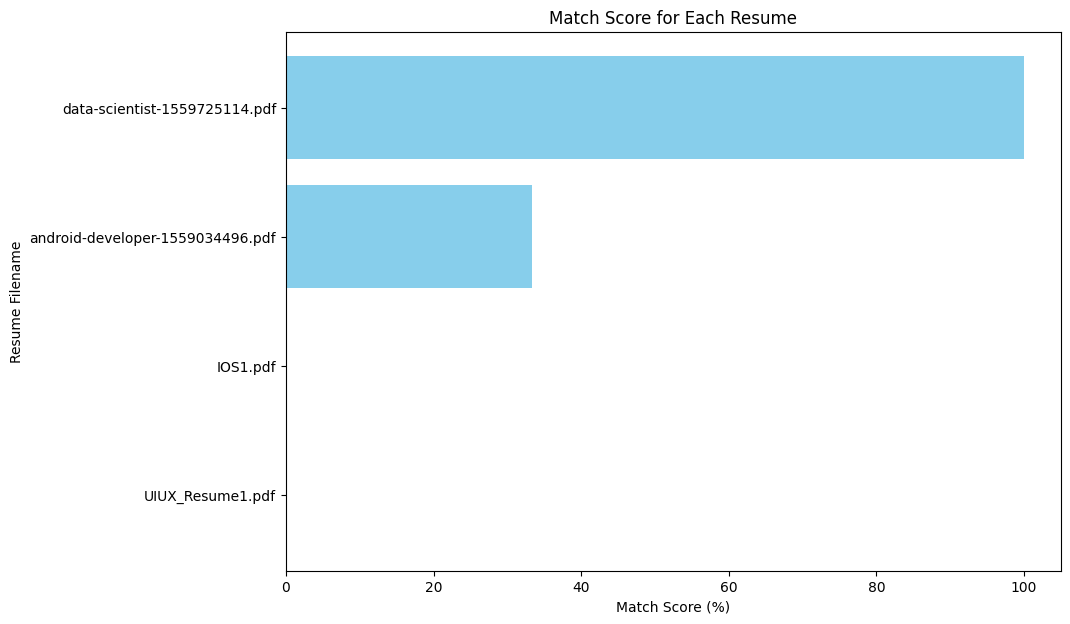

In [ ]:
import os

# Define required skills
required_skills = [
    "Python", "Machine Learning", "Data Analysis"
]



def infer_skills(matched_skills, required_skills):
    """
    Infer additional skills based on matched skills and limit them to those relevant to the job.
    Only include inferred skills that are not directly mentioned in the resume but are relevant to the required skills.
    """
    inferred_skills = set()

    # A helper function to traverse the nested dictionary
    def traverse_skills(mapping, skill):
        for key, value in mapping.items():
            if isinstance(value, list) and skill in value:
                return set(value)
            elif isinstance(value, dict):
                found_skills = traverse_skills(value, skill)
                if found_skills:
                    return found_skills
        return set()

    # Loop through matched skills and find related skills in the inference map
    for skill in matched_skills:
        related_skills = traverse_skills(skill_inference, skill)
        # Only keep relevant skills that intersect with required_skills and are not already matched
        relevant_skills = related_skills.intersection(required_skills) - set(matched_skills)
        inferred_skills.update(relevant_skills)

    return inferred_skills



def calculate_match_score(matched_skills, inferred_skills, required_skills):
    """Calculate the match score based on the overlap between candidate's combined skills and required skills."""

    # Combine matched skills with inferred skills
    combined_skills_set = set(matched_skills).union(inferred_skills)
    required_skills_set = set(required_skills)

    # Calculate intersection of combined skills with required skills
    matched_required_skills = combined_skills_set.intersection(required_skills_set)

    # Calculate match score as the ratio of matched required skills to total required skills
    match_score = (len(matched_required_skills) / len(required_skills_set)) * 100

    return matched_required_skills, inferred_skills, match_score


def process_resumes_from_directory(directory_path, job_requirements):
    """Process all resumes in a directory and rank them based on job requirements."""
    resumes = []

    for filename in os.listdir(directory_path):
        if filename.lower().endswith(".pdf"):
            file_path = os.path.join(directory_path, filename)
            with open(file_path, "rb") as file:
                text = extract_text_from_pdf(file)
                matched_skills = extract_skills(text, required_skills)
                inferred_skills = infer_skills(matched_skills, required_skills)

                # Calculate match score and get detailed information
                matched_required_skills, inferred_skills, match_score = calculate_match_score(matched_skills, inferred_skills, required_skills)

                resumes.append({
                    "filename": filename,
                    "text": text,
                    "matched_skills": ', '.join(matched_skills),
                    "inferred_skills": ', '.join(inferred_skills),
                    "matched_required_skills": ', '.join(matched_required_skills),
                    "match_score": match_score
                })

    if not resumes:
        print("No resumes were processed. Check the directory path or PDF files.")
        return

    # Rank resumes by match score
    sorted_resumes = sorted(resumes, key=lambda x: x['match_score'], reverse=True)

    # Output ranked resumes
    df = pd.DataFrame(sorted_resumes)
    print("\nRanked Resumes:")
    print(df[['filename', 'matched_skills', 'inferred_skills', 'matched_required_skills', 'match_score']])

    # Plotting the bar chart
    plt.figure(figsize=(10, 7))
    plt.barh(df['filename'], df['match_score'], color='skyblue')
    plt.xlabel('Match Score (%)')
    plt.ylabel('Resume Filename')
    plt.title('Match Score for Each Resume')
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest match score on top
    plt.show()

# Example usage
if __name__ == "__main__":
    directory_path = "/content"
    process_resumes_from_directory(directory_path, required_skills)
